<a href="https://colab.research.google.com/github/strongway/tutorial_data_science/blob/master/basic_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical and computational neuroscience

## Basic Statistics and statistical tests

Zhuanghua Shi (shi@lmu.de, https://msense.de)

## 0. Poll: optional coding tutorials

Last two weeks Werner gave basic tutorial of Python and found it might be helpful to offer additional coding tutorials. So we would like to know:

* How many people are interested in this optional coding tutorials?
* What aspects of coding or statistics do you want to cover in the tutorial. 



## 1. Variable types and Statistical tests

General speaking, statistical tests/models are about the relation between independent variable (IV, Predictor variable) and dependent variable (DV, outcome variable). In psychological studies, we apply some manipulations or treatments to observe different outputs. For examples, we want to compare performance differences among groups, or we want to show if a treatment works for improving learning skills. The groups we compare or the treatments would be IVs, and the observed outcomes would be DVs. 

Variables can be classified into to four types: _Nominal, ordinal, interval, and ratio_. Depending on the types of IV and DV, we need to apply different types of statistical tests. 

Examples:
* Nominal: Gender (male/female), Binary response (Left/Right)
* Ordinal: Preference (first, second, third), ranking
* Interval: Temperature (hold no true zero, can below 0)
* Ratio: height, age (has true zero, never fall below 0). 

### Choosing a statistical test

A very useful chart I borrowed from scribbr.com/statistics: 
![](https://cdn.scribbr.com/wp-content/uploads//2020/01/flowchart-for-choosing-a-statistical-test.png)





**Note**, this is not a pure statistics course, we will not cover all of those tests. Rather, we only quickly go through those main statistical tests that you can apply to your research projects, and provide basic knowledge for the next computational neuroscience. So in this crash course, we will mainly discuss the standard t-tests, ANOVA (repeated-measures), correlation analysis. Next two weeks we will then discuss the simple regression and logistic regression. The main purpose is to understand the basic ideas of statistical tests and apply to your real research studies. So the emphaszie will be on how to use them. 

In Python there are multiple statistical packages available, such as `scipy`, `statsmodels` etc. 

`scipy` is a collection of numerical algorithms and domain-specific toolboxes, not limited to statistics, also include image analysis, signal processing etc. The data format is mainly based on `numpy` matrices and arrays. 

`statsmodels` is a statistical model package provides many classes and functions to create a statistical estimation, such as the general linear model (GLM), time-series models and moethods. It use data frames (pandas) and formular format, which is similar to R statistics. 

However, none of them provide all statistics that we want to report in a single test (similar to JASP or SPSS), such as the effect size, Bayes factor, post-hoc tests etc. You have to combine multiple packages together to achieve that. Fortunately, we have newly  devloped package[ `pingouin`](https://pingouin-stats.org/) solves this problem! It gives the essential statistics that we want. In fact, the author of `pingouin`, [Raphael Vallat](https://raphaelvallat.com/), is a French postdoc researcher in the center for human sleep science at UC Berkeley. He knows what we psychologists want!


In [ ]:
# a statistical pacakge pingouin we need. See subsection 3. 
!pip install pingouin

     |████████████████████████████████| 182 kB 5.7 MB/s 
     |████████████████████████████████| 38.2 MB 23 kB/s 
     |████████████████████████████████| 9.8 MB 42 kB/s 
  Created wheel for pingouin: filename=pingouin-0.5.0-py3-none-any.whl size=193661 sha256=ede049887cbe1348d49c0906c7cf025a1520c995f613f14924ff5c3e40c52941
  Stored in directory: /root/.cache/pip/wheels/14/46/f9/cedd81d68d2515c24bbbd000d5b347e4fe092ccc4b568f7f70
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=9a1f7ce0e32e544828e6d97c8a0e07695b16bc6fb0071154e5e0a6c2fa03870c
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmode

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.stats as st #  statistics from scipy
import matplotlib.pyplot as plt  # visualization
import seaborn as sns  # statistical visualization
import pingouin as pg  # statistical test
# Set the default Pandas float precision to 3 decimals
pd.set_option("display.precision", 3)
pd.set_option("display.max_rows",5)
%matplotlib inline


## 1. T-tests

Most continuous variables we measure follow Gaussian distribution. When we aim to compare two groups with small sample size, the construction of statistical test requires t-distribution. Both distributions are very similar. 

### Guassian (Normal) distribution

The density of Guassian distribution is defined as

$$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\cdot e^{-\frac{(x-\mu)^2}{2\sigma^2}},$$

where $\mu, \sigma$ represent the mean and standardard deviation of the distribution.

### Student's t-distribution

The t-distribution plays a role in a number of widely used statistical analyses, including t-test. t-distribution is very similar to Gaussian distribution, but with heavier tails, meaning that it is more prone to producing values that fall far from its mean. 

When the degree of freedom (DF) is greater than 30, t distribution is close to the Gaussian distribution. 

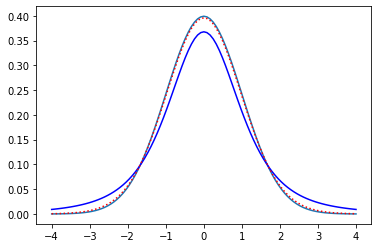

In [ ]:
# specify the x range
x = np.linspace(-4,4,99)
y = st.norm.pdf(x, 0, 1)
df1 = 3
z1 = st.t.pdf(x,df1)
df2 = 30
z2 = st.t.pdf(x,df2)

plt.figure()
plt.plot(x,y) # normal pdf
plt.plot(x,z1, 'b') # t(3) distribution
plt.plot(x,z2, 'r:') # t(30)
plt.show()

### Simple t-test

__An Example__:

Suppose you want to examin a training method if the method works for remembering more words. You designed a pre-test, training, and a post-test paradigm to evaluate $n$ participants. You then calculate the learning effect by subtract the score from the post-test from the pre-test sessions, obtained a difference score $X_i$. You want to know if the learning works or not.  

The question can be regarded as a simple statistical test: You made $n$ samples from a population with unknown mean $\mu$, and you want to test if the mean of the population is 0. So the null hypothesis:

$H_0$: the mean of the population is $\mu =0$.

Let's note the samples as $\{X_i\}_{i=1,\ldots, n}$, and the mean $\bar X$ and the standard deviation $\hat \sigma$. We can construct a statistical variable 

$$ \frac{\bar X - \mu}{\hat \sigma / \sqrt {n-1}  }\sim t(n-1).$$ 

Let's say we get 10 difference scores: {4, 3, -2, -3, 5, 2, 4, 0, 1, 1}. The mean learning score is 1.5. 

Statistical test: __Was the learning method effective?__


__Idea behind the t-test__

If we assume the samples are from the null hypothesis: the population with the mean of 0. We should predict the sample mean does not deviates too much from zero. If the sample mean deviates too much (similar to outliers, say falling into the extreme of 5%), we should have confidence to reject the null hypothesis. 

Let's visualize the location of the mean at the t-distribution using the t-transform. 

1.7999999999999998 0.9473046642067956


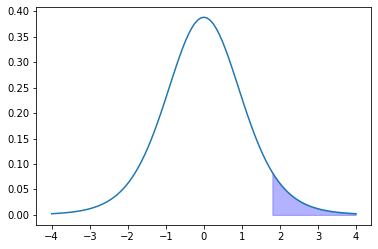

In [ ]:
x = [4, 3, -2, -3, 5, 2, 4, 0, 1, 1]

t_val = np.mean(x)/(np.std(x)/np.sqrt(10-1))
print(t_val, st.t.cdf(t_val,9))

fig, ax = plt.subplots()
xc = np.linspace(-4,4, 99)
tc = st.t.pdf(xc, 9) # degree of freedom (10-1 = 9)
ax.plot(xc, tc)
xt = np.arange(t_val, 4, 0.01)
ax.fill_between(xt, st.t.pdf(xt,9), alpha = 0.3, color = 'b')

Based on the p-value above (.947), we know it is not significant at the level of $\alpha = .05$. This can be confirmed by the one sample t-test from `scipy.stats.ttest_1samp()`. 

In [ ]:
# one sample t-test from scipy.stats is ttest_1samp()
st.ttest_1samp(x, 0, alternative = 'greater')

Ttest_1sampResult(statistic=1.7999999999999998, pvalue=0.05269533579320447)

In [ ]:
#using Pingouin.ttest
pg.ttest(x, 0, alternative='greater')  # alernative default: two-sided, can be 'greater', 'less'. 

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.8,9,greater,0.052695,"[-0.03, inf]",0.56921,2.033,0.507252


You can see Python have multiple ways to obtain the same results. One package may provide better outputs than the another. 

`t-test` from `pingouin` provide additional outputs, which are similar to SPSS or R statistics, better than the scipy t-test. The later provides only the t-value and p-value. 


### Alternative non-parameter test - Permutation test

The same statitical question can be treated in an alternative way. The null hypothesis is the samples come from the population with mean of 0 (i.e., no learning effect). So the learning effects we observe is simply random fluctuation. If we randomly flip the signs of the learning effect, it should make no difference. We can simulate random flipping for multiple times, and see what the mean distribution we observe. 

In [ ]:
#to understand the following code, let's look how we generate 10 random signs
np.random.randint(0,2,10)*2 -1

array([-1, -1,  1,  1, -1,  1,  1, -1,  1, -1])

The percentile of the observed data in the simultation: 0.9355


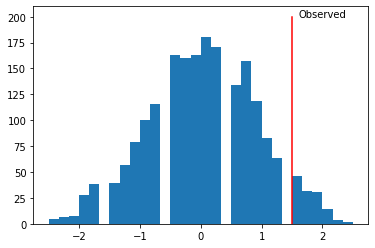

In [ ]:
num_sim = 2000

sim_means = [np.mean((np.random.randint(0,2, 10)*2. -1)*x) for i in np.arange(num_sim)]
plt.figure()
plt.hist(sim_means, bins = 30)
plt.plot([np.mean(x), np.mean(x)],[0, 200],'r')
plt.annotate('Observed', xy = (np.mean(x)+0.1,200))

print('The percentile of the observed data in the simultation:', np.mean(sim_means<np.mean(x)))

__Permutation test__

The above non-parameter test using simulation is a typical example of [permutation test](https://en.wikipedia.org/wiki/Permutation_test). 
Permutation test is a type of statistical test under the null hypothesis by calculating all possible values of the test statistic under all possible rearrangements of the observed data points. 

## 2. ANOVA tests

When the number of factor levels is greater than 2, multiple t-tests would cause potential false positive results. This is because if we set the significant level at $\alpha = 0.05$, three multiple comparison (t-tests) will yield $\alpha = 1 - (1-0.05)^3 \simeq 0.14$, way higher than $0.05$. 

Analysis of variance (ANOVA) is used to compare the mean among three or more levels / groups. For example, the above example about the number of species of penguin is three. 

__Basic idea behind ANOVA__: The total variance of the sampled data can be decomposed into systematic variance (between group) and residual variance (within group):

$$ SSE_{total} = SSE_{between} + SSE_{within} $$

If the average variation between groups is large enough compared to the average variation within groups, then we should expect at least one group has different means as the other groups. 

So we can construct a ratio variable,

$$ f = \frac{MSE_{between}}{MSE_{within}},$$

where $MSE_i = SSE_i/df_i$.
This random variable follows the F-distribution (F-test). 

ANOVA tests only tell you there is difference or not among groups, but not about which group is significant from which. In order to get the significance between groups, we need to run further post-hoc test (multiple comparisons). In order to correct the problem of multiple comparisons, we need to apply some correction method, such as Bonferroni, Tukey correction. 

__Repeated measures ANOVA__
In psychology, we often use within-subject design, testing multiple conditions within each participants to reduce influences of individual differences. If the number of comparison conditions is only two, this would be reduced to the paired t-test. Before calculating the significance level, Mauchly's test is needed to assess the homogeneity of the variance (i.e., sphericity) with all possible pairs. If there is any violation of sphericity, you should select a corrected method, such as Greenhouse-Geisser method. 


In [ ]:
# An example from pingouin package
df = pg.read_dataset('penguins') # example dataset from Pingouin

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female
1,Adelie,Biscoe,37.7,18.7,180.0,3600.0,male
2,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female
3,Adelie,Biscoe,38.2,18.1,185.0,3950.0,male
4,Adelie,Biscoe,38.8,17.2,180.0,3800.0,male


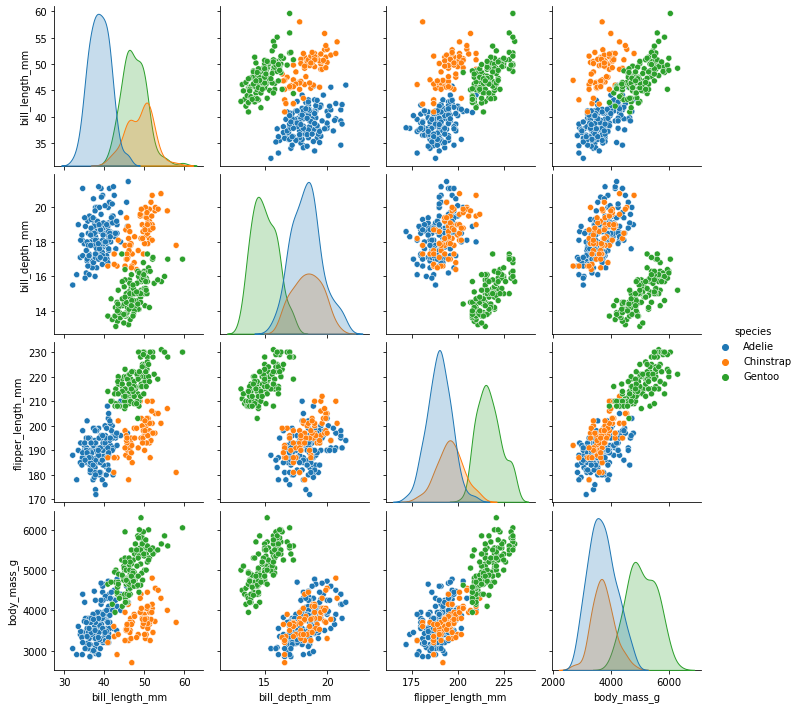

In [ ]:
# lets visualize data using seaborn.pairplot()
sns.pairplot(df, hue = 'species')

ANOVA test usign a pandas DataFrame. 

In [ ]:
pg.anova(data = df, dv = 'flipper_length_mm', between = 'species')

,Source,ddof1,ddof2,F,p-unc,np2
0,species,2,339,594.802,1.352e-111,0.778


The results show that there is a significant difference between the means of of three groups. Now we need to do post-hoc comparisons to find out which group is different from which group. 

For selecting tests and functions, `pingouin` provides a nice guideline flow chart below:

![](https://pingouin-stats.org/_images/flowchart_one_way_ANOVA.svg). 
For the simple ANOVA post-hoc comparison, we should select Tukey-HSD test. 

In [ ]:
# post-hoc comparison, the input parameters are similar to the ANOVA

posthoc = pg.pairwise_tukey(data = df, dv = 'flipper_length_mm', between = 'species')
posthoc

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Adelie,Chinstrap,189.954,195.824,-5.870,0.970,-6.052,0.001,-0.881
1,Adelie,Gentoo,189.954,217.187,-27.233,0.807,-33.760,0.001,-4.089
2,Chinstrap,Gentoo,195.824,217.187,-21.363,1.004,-21.286,0.001,-3.204


### Exercise
Now let's look into a practical dataset about the relation of student performance to some potential factors (gender, race, lunch etc.) for an exercise. 

First we import the data from kaggle [students-performance-in-exams](https://www.kaggle.com/spscientist/students-performance-in-exams). For your convenience, I also made a copy in github. You can use the following URL to load the data

In [ ]:
performance = pd.read_csv('https://raw.githubusercontent.com/strongway/tutorial_data_science/master/StudentsPerformance.csv')
performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# we add additional column total_score
performance['total_score'] = performance['math score'] + performance['reading score'] + performance['writing score']
performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


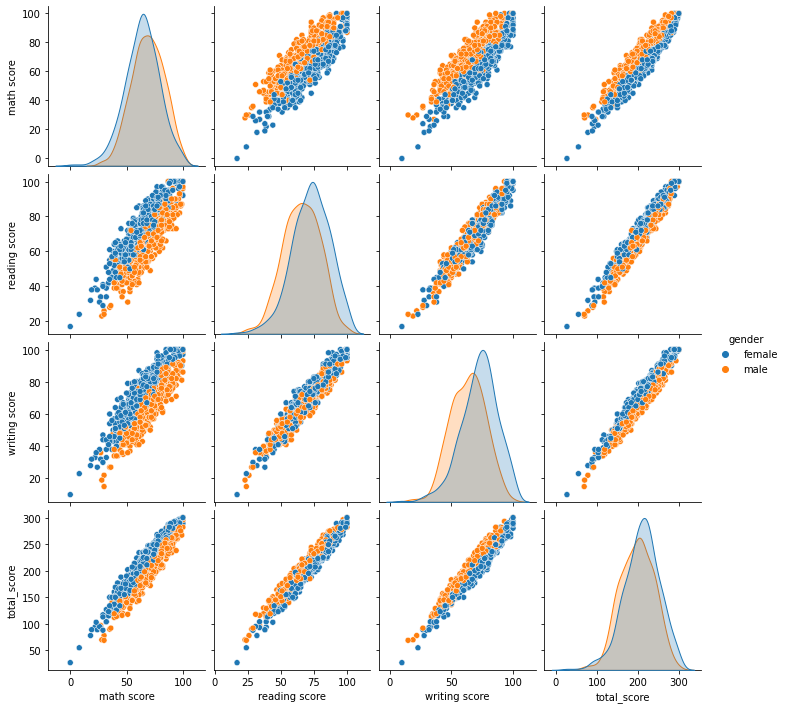

In [ ]:
sns.pairplot(performance, hue = 'gender')

In [ ]:
# Your task: please visulize the relations using pairplot() separate for 'lunch', or 'race/ethnicity'
#sb.pairplot(performance, hue = '___')

Let's check if there is any significant difference between genders. 


In [ ]:
p_male = performance.query('gender == "male"')
p_female = performance.query('gender == "female"')
pg.ttest(p_male.total_score, p_female.total_score)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.179,997.847,two-sided,3.186e-05,"[-16.45, -5.94]",0.264,361.725,0.986


Now let's check if there are any differences among races for the total_score. 
How many races do we have in the data? Should we apply t-test or ANOVA?

In [ ]:
performance['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [ ]:
#your code here
#

#### Solution


In [ ]:
# print mean, std, se of each group
print(performance.groupby('race/ethnicity').total_score.agg(['mean','std','count']))

# classical ANOVA test
pg.anova(data = performance, dv = 'total_score', between = 'race/ethnicity' )

                   mean     std  count
race/ethnicity                        
group A         188.978  43.334     89
group B         196.405  44.196    190
group C         201.395  41.617    319
group D         207.538  39.758    262
group E         218.257  43.695    140


,Source,ddof1,ddof2,F,p-unc,np2
0,race/ethnicity,4,995,9.096,3.226e-07,0.035


### Repeated-measures ANOVA

Behavorial studies often encounter huge differences among participants. To reduce the influence of individual differences, we often use _within-subject_ design. Multiple conditions are measured within each participants and repeated for all participants. Similar to the classical ANOVA, we need to partition the sums of variance. The act of partitioning, or splitting up, is the core idea of ANOVA. In the classical ANOVA, we split

$$ SS_{Total} = SS_{Between} + SS_{Within}$$

In a repeated-measures design, we can further partition the above $SS_{Within}$ to $SS_{Subjects} + SS_{Error}$, so the formula becomes as follows:

$$ SS_{Total} = SS_{Effect} + SS_{Subjects} + SS_{Error}$$

Similarly, we construct the f-test

$$ f = \frac{MSE_{Effect}}{MSE_{Error}}$$

#### An Example
Let's take a real example from one of my study:
Zhu, X., Baykan, C., Müller, H. J., & Shi, Z. (2021). Temporal bisection is influenced by ensemble statistics of the stimulus set. Attention, Perception & Psychophysics, 83(3), 1201–1214. https://doi.org/10.3758/s13414-020-02202-z

In this study we compare how ensemble statistics influence temporal bisection. We estimated the point of subjective equality (PSE) for each condition and use this PSE to judge if there are any significant changes in duration perception. I skip the detail design here and the estimation method (from logistic regression), and mainly focus on statistical tests. 

The results from Experiment 1 looks like this:

![](https://media.springernature.com/lw685/springer-static/image/art%3A10.3758%2Fs13414-020-02202-z/MediaObjects/13414_2020_2202_Fig2_HTML.png?as=webp) 

The estimated PSEs are listed [here](https://raw.githubusercontent.com/msenselab/sets_in_bisection/master/modelling/psy_quickpsy_observed.csv). Note, the estimated results are pooled together from three experiments. Rows 1-30 belong to Experiment 1, 31-60 Experiment 2, 61 - 90 Experiment 3. 

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/msenselab/sets_in_bisection/master/modelling/psy_quickpsy_observed.csv')
data.head()


,Unnamed: 0,cond,NSub,jnd,pse,slope
0,1,PS,1,128.316,1079.644,2.639
1,2,PS,2,105.319,1032.560,2.700
2,3,PS,3,183.720,816.774,2.497
3,4,PS,4,100.547,663.981,2.713
4,5,PS,5,141.699,656.080,2.604


In [ ]:
# Let's test PSEs for Experiment 1
exp1 = data.loc[0:29] # indexing from 0!
pg.pairwise_ttests(data = exp1, dv = 'pse', within = 'cond', subject = 'NSub')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,cond,NS,PS,True,True,4.598,14.0,two-sided,4.141e-04,82.828,0.607


In [ ]:
# Alternative ANOVA also provide the same result
pg.rm_anova(data = exp1, dv = 'pse', within = 'cond', subject = 'NSub')

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,cond,1,14,21.141,4.141e-04,0.602,1.0


### Exercise

Please test Experiment 3, and check if PSEs were different between two conditions. 

In [ ]:
# not run
exp3 = data.loc[__:__] # indexing from 0!
pg.pairwise_ttests(data = exp3, dv = __, within = ____, subject = ___)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,cond,I T-shaped,U-shaped,True,True,0.033,14.0,two-sided,0.974,0.263,0.01


## Correlation analysis

Here is the flow chart from pingouin official website:

![](https://pingouin-stats.org/_images/flowchart_correlations.svg)


HZResults(hz=0.8115667538894298, pval=0.2848198723541619, normal=True)


,n,r,CI95%,p-val,BF10,power
pearson,500,-0.01,"[-0.1, 0.08]",0.817,0.058,0.056


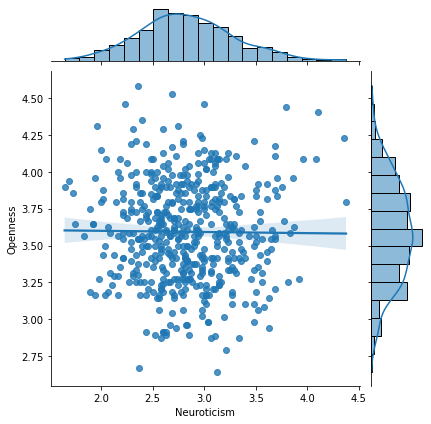

In [ ]:
# offical example

# Load an example dataset with the personality scores of 500 participants
df = pg.read_dataset('pairwise_corr')

# 1.Test for bivariate normality (optional)
print(pg.multivariate_normality(df[['Neuroticism', 'Openness']]))

# 1bis. Visual inspection with a histogram + scatter plot (optional)
sns.jointplot(data=df, x='Neuroticism', y='Openness', kind='reg')

# 2. If the data have a bivariate normal distribution and no clear outlier(s), we can use a regular Pearson correlation
pg.corr(df['Neuroticism'], df['Openness'], method='pearson')



## Statistial visualization via Seaborn

Seaborn plotting functions can be rougphly divided into three categories: Relational plots, distribution plots, and categorial plots. 

![Searborn Plots](https://seaborn.pydata.org/_images/function_overview_8_0.png)

Common parameters of seaborn functions:

  * `data`: source data
  * `x, y` : x-axis and y-axis
  * `hue`: the column you want to use as separate color
  * `kind`: type of plot you want, such as `line`, `scatter`, `kde`,which depends on your function. 


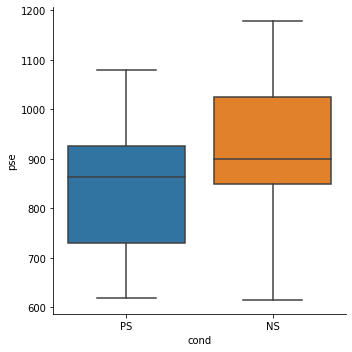

In [ ]:
# For example, let's say we want to visualize the PSE of Experiment 1 from Zhu et al. (2021)
sns.catplot(data = exp1, kind = 'box', x = 'cond', y = 'pse')

In [ ]:
# your task: please visualize the JND from Experiment 1
# your code here


In [ ]:
# please change the boxplot to barplot


If you want to visualize what we did in the paper, you can use both boxplot() and swarmplot() together. 

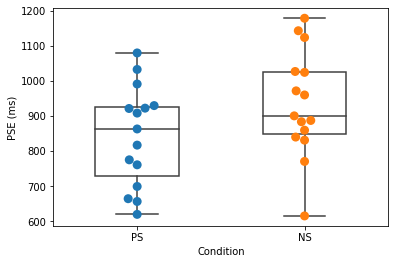

In [ ]:
ax = sns.swarmplot(data = exp1, x = 'cond', y = 'pse', size = 9)
sns.boxplot(data = exp1, x = 'cond', y = 'pse', boxprops = {'facecolor':'None'}, width = 0.5,  ax = ax) # provide axis from swarmplot
ax.set_xlabel('Condition')
ax.set_ylabel('PSE (ms)')
plt.show()

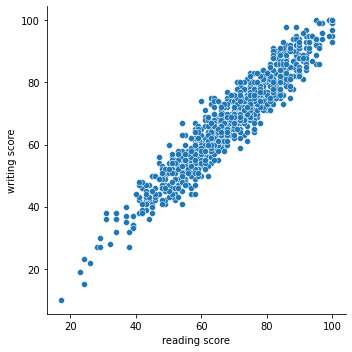

In [ ]:
# scatter plot 
# use the above performance example
sns.relplot(data = performance, kind = 'scatter', x = 'reading score', y = 'writing score')

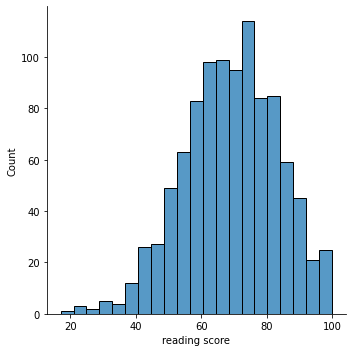

In [ ]:
# visualize distribution
sns.displot(data = performance, kind = 'hist', x = 'reading score')

#### your task

Please change the plotting type and dependent variable and try it out yourself. 